<div class="alert alert-block alert-success">
<h1><b>TITLE:</b>Tool for Walking and Learning Hamiltonian Paths in Torus-Enhanced Butterfly Networks using a Dynamic Programming Approach</h1>
</div>

<div class="alert alert-block alert-info">
<h1><b>I.</b> INITIALIZATION SECTION</h1> 

</div>

## 1. Import some libraries

In [1]:
# IMPORT the libraries
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools
import time
from IPython.display import Markdown

### If the importing failed, then install the library first
#### run the following syntax: _%pip install packagename_

In [2]:
# Delete # in front of the following command to install the package
#%pip install more-itertools
#%pip install pandas
#%pip install time 

## 2. Define some functions needed

In [3]:
# Function to convert a number to a string with leading zeros.
def converter(i,n):
    ibin = str(i).zfill(n)
    return ibin
#example:
converter(1100,8)

'00001100'

In [4]:
# Function to decide whether a path is a Hamiltonian path or not
def is_hamiltonian_path_or_cycle(path, graph):
    if len(path) != len(set(path)):
        return "Not a Hamiltonian (Repeated vertices)"
    if len(path) == len(graph.nodes()):
        if graph.has_edge(path[-1], path[0]):
            return "Hamiltonian Cycle"
        else:
            return "Hamiltonian Path"
    elif len(path) == len(graph.nodes()) - 1:
        return "Hamiltonian Path"
    else:
        return "Not a Hamiltonian (Incomplete path)"

# Function to enumerate all possible paths in the graph, starting from a start node
def enumerate_paths(graph, start, path=[]):
    path = path + [start]
    if len(path) == len(graph.nodes()):
        yield path
    for neighbor in graph.neighbors(start):
        if neighbor not in path:
            for new_path in enumerate_paths(graph, neighbor, path):
                yield new_path

In [5]:
# Function to collect only Hamiltonian paths
def hampathcycle(aGraph):
    all_paths = []
    for start_node in aGraph.nodes():
        paths = list(enumerate_paths(aGraph, start=start_node))
        #print(paths)
        all_paths.extend([(start_node, path) for path in paths if is_hamiltonian_path_or_cycle(path, aGraph) == 'Hamiltonian Path'])
    #for start_node, path in all_paths:
    #    print(f"Starting from {start_node}: {path}")
    return all_paths

In [6]:
# Function to create a graph from a given list of nodes and edges
def create_graph(nodes, edges):
    G = nx.DiGraph()
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    return G

# function set color and position of nodes of a graph
def set_color_pos(G, sub):
    warna = []
    pos = []
    for w in G.nodes():
        if sub == '00':
            warna.append('red')
        if sub == '10':
            warna.append('blue')
        if sub == '01':
            warna.append('green')
        if sub == '11':
            warna.append('yellow')
    if sub =='00':
        pos = pos00
    if sub =='01':
        pos = pos01
    if sub =='11':
        pos = pos11
    if sub =='10':
        pos = pos10
    return warna, pos

In [7]:
# Function to get the next subgraph(s) of the current subgraph
# xx represents a node in TR which indicates the position of a subgraph.
# Possible values for xx are: {'00', '10', '11', '01'}
# xxv is the list of Subxx visited
def get_next_sub(hpath, xx, xxv):
    start_node = hpath[0]
    end_node = hpath[-1]
    print('current subgraph Sub', xx, ', path: ', hpath)
    b = [(v1, v2) for v1, v2 in TREB.edges() if v1==(xx, end_node) and v2[0]!=xx and v2[0] not in xxv][:] # each v1 and v2 in the form of (TR label, EB label)
    subxx = []
    for current, next in b:
        subxx.append(next[0])
    return b, subxx

## 3. Create the main Digraphs

## 3a. Create Torus TR(2, 2) Digraph 

### Read Torus TR(2,2) Data

In [8]:
tr2x2 = pd.read_excel('TR2x2.xlsx')
tr2x2[['a','b']] = tr2x2[['a', 'b']].map(lambda x: converter(x,2)) #before 0 and 1, after converted 00 and 01

In [9]:
tr2x2 

,a,b,x,y
0,00,01,0.0,0.0
1,01,11,0.5,0.0
2,11,10,0.5,-0.5
3,10,00,0.0,-0.5


### Define and create TR Digraph

In [10]:
# Define TR(2, 2) as a Directed Graph
TR = nx.DiGraph()

# Adding nodes
for v in tr2x2['a']:
    TR.add_node(v)

# Adding edges
for v1, v2 in tr2x2[['a', 'b']].values:
    TR.add_edge(v1, v2)
    TR.add_edge(v2, v1) # as it is bidirection

In [11]:
#Get node positions
pos_TR = {}
node_size = {}
for a, b, x, y in tr2x2.values:
    pos_TR[a] = (float(x), float(y))

#Set node colors
color_TR = ['red', 'green', 'yellow', 'blue']

### Visualize TR Digraph

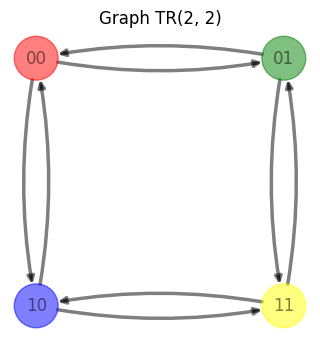

In [12]:
plt.figure(figsize=(3,3))
nx.draw(TR, pos=pos_TR, node_size=1000, with_labels=True, node_color =color_TR, alpha = 0.5, width = 2.5, font_size=12, font_color="black", connectionstyle="arc3,rad=0.1")
plt.title('Graph TR(2, 2)')
plt.savefig('TR2x2 graph.png')
plt.show()

## 3b. Create Enchanced Butterfly EB(3) Digraph

### Read Enhanced Butterfly EB(3) Data

In [13]:
EB_edges = pd.read_excel('EB3.xlsx', sheet_name='EB_edges', dtype=str)
EB_edges[['a','b']] = EB_edges[['a','b']].map(lambda x: converter(x,4)) #before 0 and 1, after converted 0000 and 0001
EB_edges

,a,b
0,0000,0010
1,0000,1001
2,0000,1000
3,1000,2000
4,1000,1100
...,...,...
67,2110,0110
68,2110,2111
69,2111,2110
70,2111,0011


In [14]:
EB_pos = pd.read_excel('EB3.xlsx', sheet_name='EB_pos')
EB_pos['v'] = EB_pos['v'].map(lambda x: converter(x,4)) #before 0 and 1, after converted 0000 and 0001
EB_pos

,v,x00,y00,x01,y01,x11,y11,x10,y10
0,0000,0,0,9,0,9,-4,0,-4
1,0001,1,0,10,0,10,-4,1,-4
2,0010,2,0,11,0,11,-4,2,-4
3,0011,3,0,12,0,12,-4,3,-4
4,0100,4,0,13,0,13,-4,4,-4
5,0101,5,0,14,0,14,-4,5,-4
6,0110,6,0,15,0,15,-4,6,-4
7,0111,7,0,16,0,16,-4,7,-4
8,1000,0,-1,9,-1,9,-5,0,-5
9,1001,1,-1,10,-1,10,-5,1,-5


### Define and create EB Digraph

In [15]:
EB = nx.DiGraph()
#prefixG00 = '00'

map_vertexG00 = {}
# Menambahkan simpul-simpul G0
for v1, v2 in EB_edges.values:
    #node = v 
    #node = prefixG00 + v
    #map_vertexG00[v] = node
    EB.add_edge(v1, v2)

In [16]:
#Get node positions
pos00 = {}
pos01 = {}
pos11 = {}
pos10 = {}
for data_pos in EB_pos.values:
    node, x00, y00, x01, y01, x11, y11, x10, y10 = data_pos
    pos00[node] = (x00, y00)
    pos01[node] = (x01, y01)
    pos11[node] = (x11, y11)
    pos10[node] = (x10, y10)

### Visualize EB Digraph

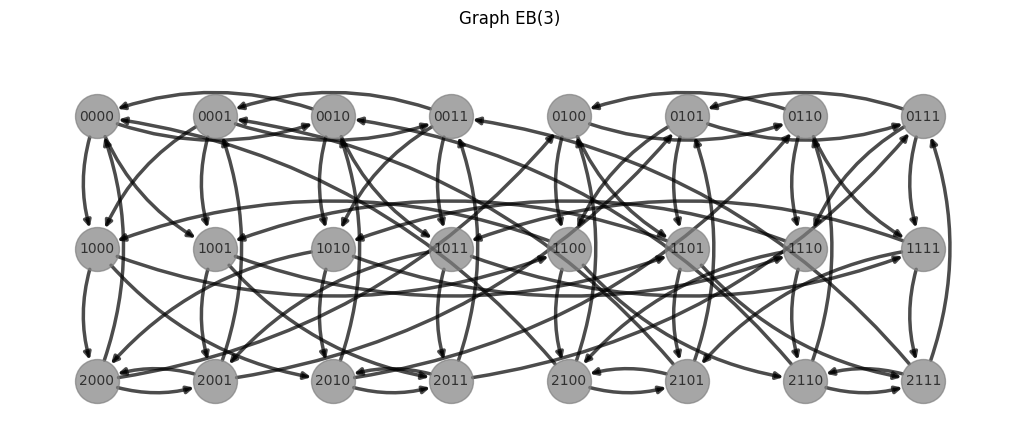

In [17]:
plt.figure(figsize=(10,4))
nx.draw(EB, pos00, arrows=True, with_labels=True, node_size=1000, font_size=10, width = 2.5, alpha = 0.7, font_color="black", node_color="Gray", connectionstyle="arc3,rad=0.2")
plt.title("Graph EB(3)")
plt.axis('off')
plt.savefig('EB3.png')
plt.show()

In [18]:
EB.degree()

DiDegreeView({'0000': 6, '0010': 6, '1001': 6, '1000': 6, '2000': 6, '1100': 6, '2010': 6, '2001': 6, '0100': 6, '0001': 6, '0011': 6, '2011': 6, '1101': 6, '0101': 6, '1010': 6, '1011': 6, '1110': 6, '0110': 6, '0111': 6, '1111': 6, '2100': 6, '2110': 6, '2101': 6, '2111': 6})

## 3c. Define and create TREB network Digraph

### Perform Cartesian Product TR x EB

In [19]:
#Generate TREB network graph by cartesian product of TR x EB
TREB = nx.DiGraph()
TREB = nx.cartesian_product(TR, EB)

In [20]:
# Create a dictionary for node positions and a list for node colors in TREB
TREB_pos = {}
TREB_color = []
for node in TREB.nodes():
    xx, n = node 
    if xx=='00':
        pos = pos00[n]
        color = 'red'
    if xx=='01':
        pos = pos01[n]
        color = 'green'
    if xx=='11':
        pos = pos11[n]
        color = 'yellow'
    if xx=='10':
        pos = pos10[n]
        color = 'blue'
    TREB_pos[node] = pos
    TREB_color.append(color)

In [21]:
print(TREB_pos)
print(TREB_color)

{('00', '0000'): (0, 0), ('00', '0010'): (2, 0), ('00', '1001'): (1, -1), ('00', '1000'): (0, -1), ('00', '2000'): (0, -2), ('00', '1100'): (4, -1), ('00', '2010'): (2, -2), ('00', '2001'): (1, -2), ('00', '0100'): (4, 0), ('00', '0001'): (1, 0), ('00', '0011'): (3, 0), ('00', '2011'): (3, -2), ('00', '1101'): (5, -1), ('00', '0101'): (5, 0), ('00', '1010'): (2, -1), ('00', '1011'): (3, -1), ('00', '1110'): (6, -1), ('00', '0110'): (6, 0), ('00', '0111'): (7, 0), ('00', '1111'): (7, -1), ('00', '2100'): (4, -2), ('00', '2110'): (6, -2), ('00', '2101'): (5, -2), ('00', '2111'): (7, -2), ('01', '0000'): (9, 0), ('01', '0010'): (11, 0), ('01', '1001'): (10, -1), ('01', '1000'): (9, -1), ('01', '2000'): (9, -2), ('01', '1100'): (13, -1), ('01', '2010'): (11, -2), ('01', '2001'): (10, -2), ('01', '0100'): (13, 0), ('01', '0001'): (10, 0), ('01', '0011'): (12, 0), ('01', '2011'): (12, -2), ('01', '1101'): (14, -1), ('01', '0101'): (14, 0), ('01', '1010'): (11, -1), ('01', '1011'): (12, -1), 

### Visualize TREB Digraph

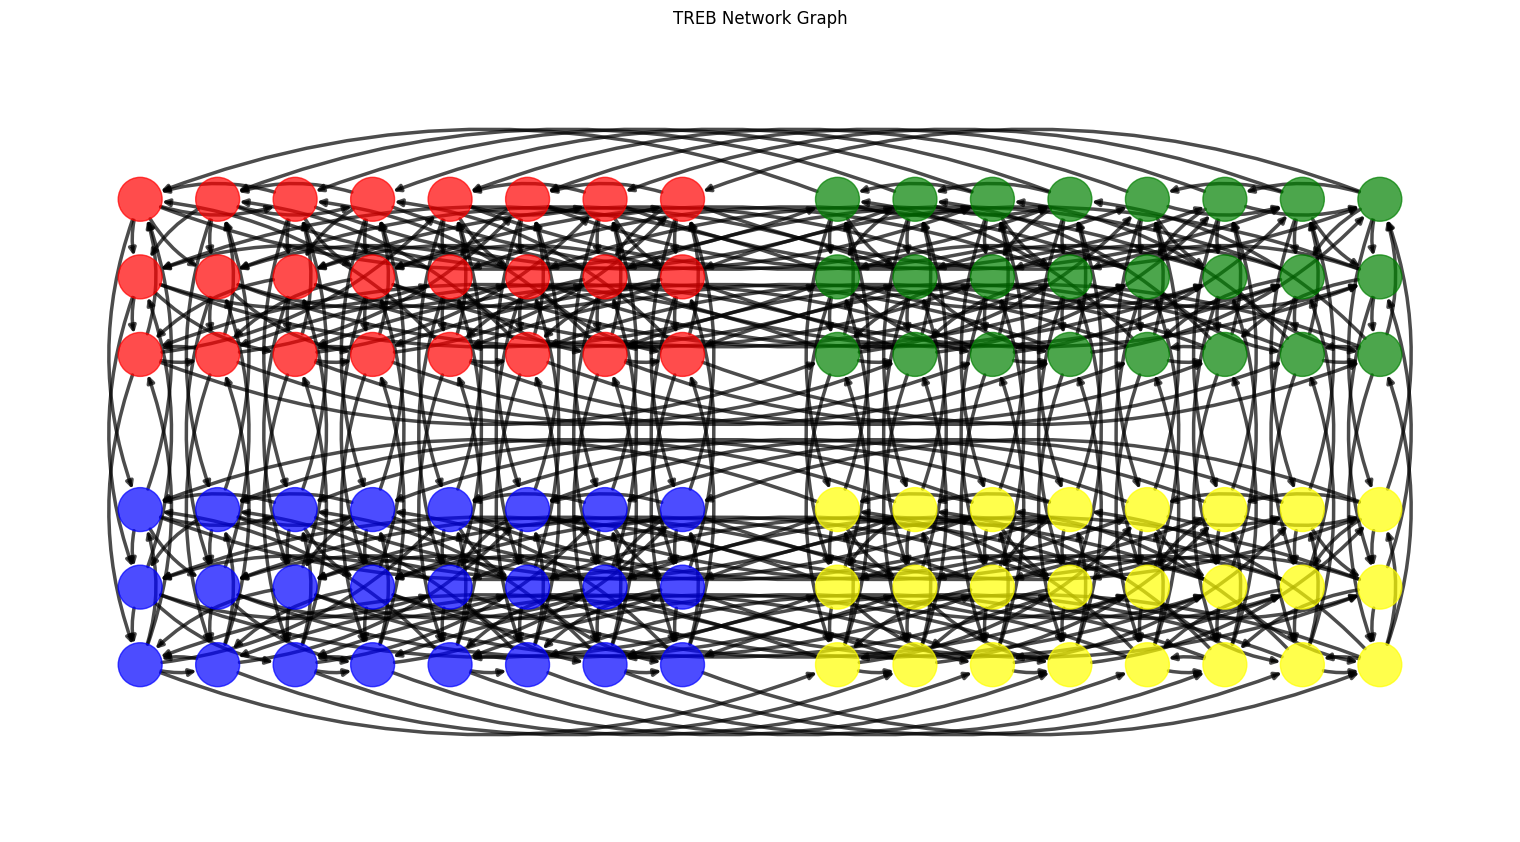

In [22]:
plt.figure(figsize=(15,8))
nx.draw(TREB, TREB_pos, arrows=True, with_labels=False, node_size=1000, font_size=10, width = 2.5, alpha = 0.7, font_color="black", node_color=TREB_color, connectionstyle="arc3,rad=0.2")
plt.title("TREB Network Graph")
plt.axis('off')
plt.savefig('TREB.png')
plt.show()

## 3d. Finding all Hamiltonian Paths in EB Graph
* `Hampath_list` is the master list containing all Hamiltonian paths in the EB Graph.
* It is created once but used repeatedly to retrieve the walk of Hamiltonian paths in each subgraph until all paths are connected as a Hamiltonian path in the TREB network.
* This approach is called the dynamic programming approac.


In [23]:
start_time = time.time()
Hampath_list = hampathcycle(EB)
end_time = time.time()

# Hitung waktu eksekusi
execution_time = end_time - start_time

# Tampilkan hasil dan waktu eksekusi
print(f"Number of Hamiltonian path found in EB: {len(Hampath_list)}")
print(f"Execution time: {execution_time} detik")

Number of Hamiltonian path found in EB: 89736
Execution time: 25.332223415374756 detik


## 3e. Exploring Hamiltonian Paths Data List
#### Users (students, teachers) may explore dataframe of hamiltonian paths (HPath) starting from node N1 

In [24]:
#Create pandas dataframe to see all Hamiltonian path records in Hampath_list = [(N1, [paths])]
#N1 = path starting node N1, paths = list of Ham. paths found starting from N1 
# Create a DataFrame
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', None)  # or you can set a specific number like 50
df = pd.DataFrame(Hampath_list, columns=[['N1', 'HPath']])

In [25]:
df

,N1,HPath
0,0000,"[0000, 0010, 1010, 2000, 2001, 0001, 1000, 1100, 2100, 0100, 1101, 1001, 2011, 2010, 0110, 1110, 2110, 2111, 0011, 1011, 1111, 2101, 0101, 0111]"
1,0000,"[0000, 0010, 1010, 2000, 2001, 0001, 1000, 1100, 2100, 0100, 1101, 1001, 2011, 2010, 0110, 1111, 2101, 0101, 0111, 1110, 2110, 2111, 0011, 1011]"
2,0000,"[0000, 0010, 1010, 2000, 2001, 0001, 1000, 1100, 2110, 2111, 0011, 1011, 2011, 2010, 0110, 1111, 2101, 0101, 0111, 1110, 2100, 0100, 1101, 1001]"
3,0000,"[0000, 0010, 1010, 2000, 2001, 0001, 1000, 1100, 2110, 2111, 0011, 1011, 1111, 2101, 0101, 0111, 1110, 2100, 0100, 1101, 1001, 2011, 2010, 0110]"
4,0000,"[0000, 0010, 1010, 2000, 2001, 0001, 1000, 2010, 0110, 1110, 2100, 0100, 1100, 2110, 2111, 0011, 1011, 2011, 0111, 1111, 2101, 0101, 1101, 1001]"
...,...,...
89731,2111,"[2111, 0111, 0101, 1101, 2101, 0001, 1001, 2011, 0011, 1010, 1110, 2100, 0000, 1000, 2010, 0110, 1111, 1011, 2001, 2000, 0100, 1100, 2110, 0010]"
89732,2111,"[2111, 0111, 0101, 1101, 2101, 0001, 1001, 2011, 0011, 1010, 1110, 2100, 0100, 1100, 2110, 0010, 0000, 1000, 2010, 0110, 1111, 1011, 2001, 2000]"
89733,2111,"[2111, 0111, 0101, 1101, 2101, 0001, 1001, 2011, 0011, 1010, 1110, 2100, 0100, 1100, 2110, 0110, 1111, 1011, 2001, 2000, 0000, 1000, 2010, 0010]"
89734,2111,"[2111, 0111, 0101, 1101, 2101, 0001, 1001, 2011, 0011, 1010, 1110, 2110, 0010, 0000, 1000, 2010, 0110, 1111, 1011, 2001, 2000, 0100, 1100, 2100]"


<div class="alert alert-block alert-info">
<h1><b>II.</b> WALKING SECTION </h1> 

</div>

# Part 1: Start walking a Hamiltonian path 

## Select a Subgraph and a Node to start walking

In [26]:
Subxx = ['00','01','11','10']

In [27]:
xx = '0'
while xx not in Subxx:
    xx = input('Select xx of a Subgraph Subxx to start:_ ')

Select xx of a Subgraph Subxx to start:_  11


In [28]:
n = '0'
while n not in EB.nodes():
    n = input('starting with which node in EB? (available from 0000 to 2111):_')

starting with which node in EB? (available from 0000 to 2111):_ 1000


In [29]:
# Display the DataFrame using HTML to wrap text in Jupyter Notebook
m = -1
while int(m) not in range(0, len(Hampath_list)+1):
    m_str = input('how many records you want to list on dataframe table? (empty means all): _')
    if m_str == '': 
        m_str = str(len(Hampath_list))
        print('empty space means all records!')
    m = int(m_str)
    print('m: ', m)

how many records you want to list on dataframe table? (empty means all): _ 10


m:  10


## Explore Hamiltonian Paths in the List, starting from that node

In [30]:
n1_list = [(n1, path) for (n1, path) in Hampath_list if n1==n][:int(m)]
print('found ', len(n1_list), ' paths with starting node ', n)
dff = pd.DataFrame(n1_list, columns=[['N1', 'HPath']])
#dff.set_index(inplace=True)
display(HTML(dff.to_html(escape=False)))

found  10  paths with starting node  1000


,N1,HPath
0,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1100, 2100, 0000, 0010, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2110]"
1,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1100, 2110, 2111, 0111, 1110, 2100, 0000, 0010, 1011, 1111, 2101, 0101, 1101]"
2,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1101, 2101, 0101, 1100, 2100, 0000, 0010, 1011, 1111, 2111, 0111, 1110, 2110]"
3,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1101, 2101, 0101, 1100, 2110, 2111, 0111, 1110, 2100, 0000, 0010, 1011, 1111]"
4,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 0010, 1011, 1111, 2101, 0101, 1100, 2110]"
5,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 2100, 0000, 0010, 1010, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2110]"
6,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 2110, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 0010, 1010, 2010]"
7,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 2110, 2111, 0111, 1110, 2100, 0000, 0010, 1010, 2010, 0110, 0100, 1101]"
8,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2100, 0000, 0010, 1010, 2010, 0110, 0100, 1100, 2110]"
9,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2110, 0110, 0100, 1100, 2100, 0000, 0010, 1010, 2010]"


## Select one path from that List

In [31]:
path_index = input('select an index number of the path in that table you want to walk through :_')
path_selected = n1_list[int(path_index)][1]
print('The Hamiltonian path you select is: ', end=' ')
print(path_selected)

select an index number of the path in that table you want to walk through :_ 0


The Hamiltonian path you select is:  ['1000', '2000', '2001', '0001', '1001', '2011', '0011', '1010', '2010', '0110', '0100', '1100', '2100', '0000', '0010', '1011', '1111', '2101', '0101', '1101', '2111', '0111', '1110', '2110']


## Visualize all paths selected

In [32]:
#create H0, graph of hamiltonian path selected by user
hamgraph_1 = nx.DiGraph()
#firstly, create node list
hamgraph_1_node_list = [node for node in path_selected]
for node in hamgraph_1_node_list: print(node, end=',')

1000,2000,2001,0001,1001,2011,0011,1010,2010,0110,0100,1100,2100,0000,0010,1011,1111,2101,0101,1101,2111,0111,1110,2110,

In [33]:
#secondly, create edges from a node to a next node
hamgraph_1_edge_list = []
node_dict = {node:i for i, node in enumerate(hamgraph_1_node_list)}
for i, edge in enumerate(hamgraph_1_node_list):
        if i > len(node_dict)-2: break
        hamgraph_1_edge_list.append((hamgraph_1_node_list[i], hamgraph_1_node_list[i+1]))

In [34]:
H0 = create_graph(hamgraph_1_node_list, hamgraph_1_edge_list)
H0.edges()

OutEdgeView([('1000', '2000'), ('2000', '2001'), ('2001', '0001'), ('0001', '1001'), ('1001', '2011'), ('2011', '0011'), ('0011', '1010'), ('1010', '2010'), ('2010', '0110'), ('0110', '0100'), ('0100', '1100'), ('1100', '2100'), ('2100', '0000'), ('0000', '0010'), ('0010', '1011'), ('1011', '1111'), ('1111', '2101'), ('2101', '0101'), ('0101', '1101'), ('1101', '2111'), ('2111', '0111'), ('0111', '1110'), ('1110', '2110')])

In [35]:
H0_color, H0_pos = set_color_pos(H0, xx)

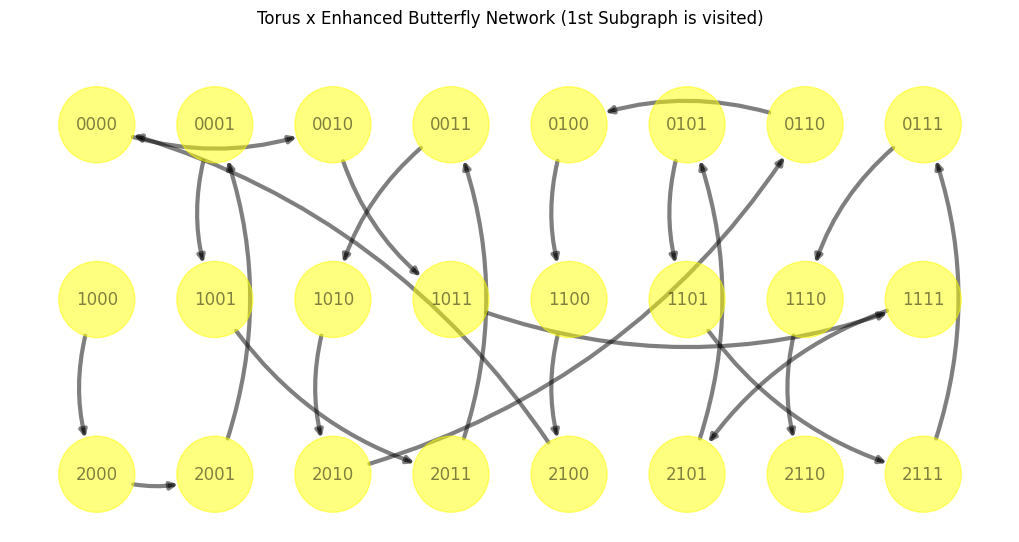

In [36]:
plt.figure(figsize=(10, 5))
nx.draw(H0, H0_pos, with_labels=True, node_color=H0_color, node_size=3000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.2")
plt.title("Torus x Enhanced Butterfly Network (1st Subgraph is visited)")
plt.axis('off')
plt.savefig('TxG.png')
plt.show()

### Finding bridges: edges that link nodes of different Subgraphs EB (with different prefix xx)
Thus we need a function to get bridges that connect a path in current Subgraph to other paths in the next adjacent Subgraph(s)

In [37]:
xxv = [] # xx of Subxx visited
xxv.append(xx)
bridges, subxx = get_next_sub(path_selected, xx, xxv)
print('Bridges available (subxx, node): ')
for b in bridges:
    print('Current', b[0], ' next: ', b[1])

current subgraph Sub 11 , path:  ['1000', '2000', '2001', '0001', '1001', '2011', '0011', '1010', '2010', '0110', '0100', '1100', '2100', '0000', '0010', '1011', '1111', '2101', '0101', '1101', '2111', '0111', '1110', '2110']
Bridges available (subxx, node): 
Current ('11', '2110')  next:  ('01', '2110')
Current ('11', '2110')  next:  ('10', '2110')


# Part 2: Continue walking to a Hamiltonian path in an adjacent Subgraph

## Select an adjacent Subgraph and a Node to continue walking.

In [38]:
#connecting to adjacent Subgraphs
subxx

['01', '10']

In [39]:
xx2 = '0'
while xx2 not in subxx:
    xx2 = input('Select xx of Subxx, a next Subgraph to continue walking:_ ')

Select xx of Subxx, a next Subgraph to continue walking:_  10


In [40]:
next_node = [next for current, next in bridges if next[0]==xx2]
print('Next node:',next_node[0][1], 'in Sub',next_node[0][0])

Next node: 2110 in Sub 10


In [41]:
n2 = next_node[0][1]

In [42]:
# Display the DataFrame using HTML to wrap text in Jupyter Notebook
m = -1
while int(m) not in range(0, len(Hampath_list)+1):
    m_str = input('how many records you want to list on dataframe table? (empty means all): _')
    if m_str == '': 
        m_str = str(len(Hampath_list))
        print('empty space means all records!')
    m = int(m_str)
    print('m: ', m)

how many records you want to list on dataframe table? (empty means all): _ 10


m:  10


## Explore Hamiltonian Paths in the List, starting from that node

### Dynamic programming approach: paths stored in 'Hampath_list' is re-retrieved and reused

In [43]:
n1_list = [(n, path) for (n, path) in Hampath_list if n==n2][:int(m)]
print('found ', len(n1_list), ' paths with starting node ', n)
dff = pd.DataFrame(n1_list, columns=[['N1', 'HPath']])
#dff.set_index(inplace=True)
display(HTML(dff.to_html(escape=False)))

found  10  paths with starting node  1000


,N1,HPath
0,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000]"
1,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 0011, 1011, 1111, 2101, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 1001, 2011]"
2,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 0011, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 2010, 0110, 0100, 1100, 1000]"
3,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 2010, 0110, 0100, 1101, 2101, 0101, 1100, 1000]"
4,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2101, 0001, 1001, 2011, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000]"
5,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2101, 0001, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000, 1001, 2011]"
6,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0011, 1011, 1111, 2101, 0001, 1001, 2011, 0111, 1110, 2100, 0000]"
7,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 0011, 1011, 1111, 2101, 0001]"
8,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1101, 2101, 0001, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 2010, 0110, 0100, 1100, 1000]"
9,2110,"[2110, 0010, 1010, 2000, 0000, 1001, 2001, 0001, 0011, 1011, 2011, 2010, 0110, 1110, 2100, 0100, 1101, 2111, 0111, 1111, 2101, 0101, 1100, 1000]"


## Select one path from that list

In [44]:
path_index = input('select an index number of the path in that table you want to walk through :_')
path_selected = n1_list[int(path_index)][1]
print('The Hamiltonian path you select is: ', end=' ')
print(path_selected)

select an index number of the path in that table you want to walk through :_ 9


The Hamiltonian path you select is:  ['2110', '0010', '1010', '2000', '0000', '1001', '2001', '0001', '0011', '1011', '2011', '2010', '0110', '1110', '2100', '0100', '1101', '2111', '0111', '1111', '2101', '0101', '1100', '1000']


## Visualize all paths selected

In [45]:
#create H0, graph of hamiltonian path selected by user
hamgraph_2 = nx.DiGraph()
#firstly, create node list
hamgraph_2_node_list = [node for node in path_selected]
for node in hamgraph_2_node_list: print(node, end=',')

2110,0010,1010,2000,0000,1001,2001,0001,0011,1011,2011,2010,0110,1110,2100,0100,1101,2111,0111,1111,2101,0101,1100,1000,

In [46]:
#secondly, create edges from a node to a next node
hamgraph_2_edge_list = []
node_dict = {node:i for i, node in enumerate(hamgraph_2_node_list)}
for i, edge in enumerate(hamgraph_2_node_list):
        if i > len(node_dict)-2: break
        hamgraph_2_edge_list.append((hamgraph_2_node_list[i], hamgraph_2_node_list[i+1]))

In [47]:
H1 = create_graph(hamgraph_2_node_list, hamgraph_2_edge_list)
H1.edges()

OutEdgeView([('2110', '0010'), ('0010', '1010'), ('1010', '2000'), ('2000', '0000'), ('0000', '1001'), ('1001', '2001'), ('2001', '0001'), ('0001', '0011'), ('0011', '1011'), ('1011', '2011'), ('2011', '2010'), ('2010', '0110'), ('0110', '1110'), ('1110', '2100'), ('2100', '0100'), ('0100', '1101'), ('1101', '2111'), ('2111', '0111'), ('0111', '1111'), ('1111', '2101'), ('2101', '0101'), ('0101', '1100'), ('1100', '1000')])

In [48]:
H1_color, H1_pos = set_color_pos(H1, xx2)

In [49]:
H1_pos

{'0000': (0, -4),
 '0001': (1, -4),
 '0010': (2, -4),
 '0011': (3, -4),
 '0100': (4, -4),
 '0101': (5, -4),
 '0110': (6, -4),
 '0111': (7, -4),
 '1000': (0, -5),
 '1001': (1, -5),
 '1010': (2, -5),
 '1011': (3, -5),
 '1100': (4, -5),
 '1101': (5, -5),
 '1110': (6, -5),
 '1111': (7, -5),
 '2000': (0, -6),
 '2001': (1, -6),
 '2010': (2, -6),
 '2011': (3, -6),
 '2100': (4, -6),
 '2101': (5, -6),
 '2110': (6, -6),
 '2111': (7, -6)}

### Create Link

In [50]:
H0_pos

{'0000': (9, -4),
 '0001': (10, -4),
 '0010': (11, -4),
 '0011': (12, -4),
 '0100': (13, -4),
 '0101': (14, -4),
 '0110': (15, -4),
 '0111': (16, -4),
 '1000': (9, -5),
 '1001': (10, -5),
 '1010': (11, -5),
 '1011': (12, -5),
 '1100': (13, -5),
 '1101': (14, -5),
 '1110': (15, -5),
 '1111': (16, -5),
 '2000': (9, -6),
 '2001': (10, -6),
 '2010': (11, -6),
 '2011': (12, -6),
 '2100': (13, -6),
 '2101': (14, -6),
 '2110': (15, -6),
 '2111': (16, -6)}

In [51]:
H1_pos

{'0000': (0, -4),
 '0001': (1, -4),
 '0010': (2, -4),
 '0011': (3, -4),
 '0100': (4, -4),
 '0101': (5, -4),
 '0110': (6, -4),
 '0111': (7, -4),
 '1000': (0, -5),
 '1001': (1, -5),
 '1010': (2, -5),
 '1011': (3, -5),
 '1100': (4, -5),
 '1101': (5, -5),
 '1110': (6, -5),
 '1111': (7, -5),
 '2000': (0, -6),
 '2001': (1, -6),
 '2010': (2, -6),
 '2011': (3, -6),
 '2100': (4, -6),
 '2101': (5, -6),
 '2110': (6, -6),
 '2111': (7, -6)}

In [52]:
hamgraph_1_node_list[-1]

'2110'

In [53]:
#Prepare for the bridge nodes
H0H1_link = nx.DiGraph()
H0H1_link.add_edge(xx+hamgraph_1_node_list[-1], xx2+hamgraph_2_node_list[0])
#
H0H1_pos = {}
H0H1_pos[xx+hamgraph_1_node_list[-1]] = H0_pos[hamgraph_1_node_list[-1]]
H0H1_pos[xx2+hamgraph_2_node_list[0]] = H1_pos[hamgraph_2_node_list[0]]
#

In [54]:
H0H1_pos

{'112110': (15, -6), '102110': (6, -6)}

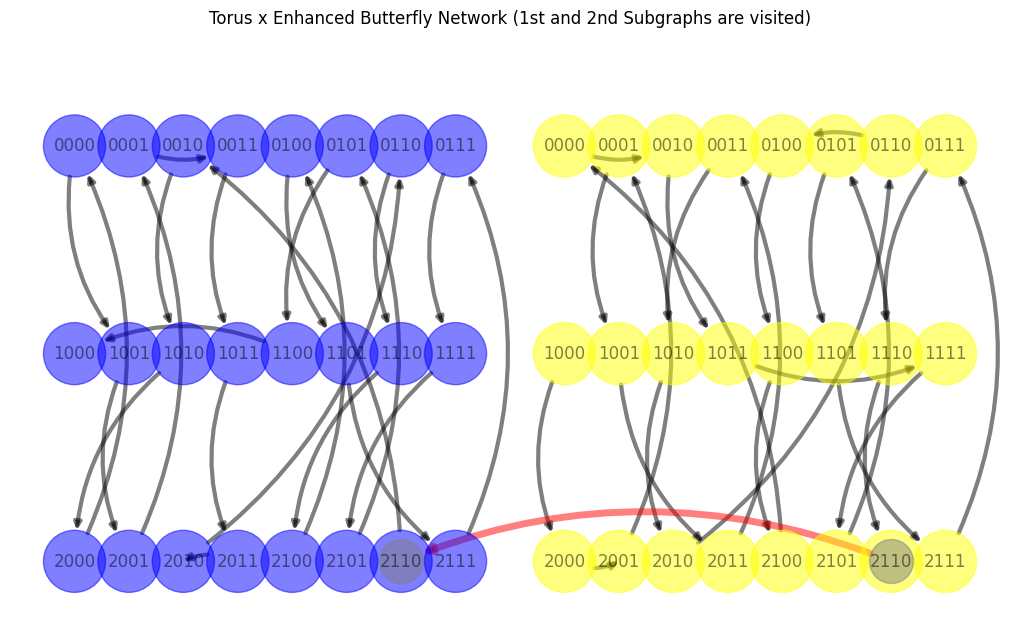

In [55]:
plt.figure(figsize=(10, 6))
nx.draw(H0, H0_pos, with_labels=True, node_color=H0_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.25")
nx.draw(H1, H1_pos, with_labels=True, node_color=H1_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.25")
nx.draw(H0H1_link, H0H1_pos, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.5, font_color="gray", font_weight="bold", edge_color="red", arrows=True, connectionstyle="arc3,rad=0.2")
plt.title("Torus x Enhanced Butterfly Network (1st and 2nd Subgraphs are visited)")
plt.axis('off')
plt.savefig('TxG.png')
plt.show()

# Part 3: Continue walking to a Hamiltonian path in an adjacent Subgraph

## Select an adjacent Subgraph and a Node to continue walking.

In [56]:
xxv.append(xx2)
bridges, subxx = get_next_sub(path_selected, xx2, xxv)
print('Bridges available (subxx, node): ')
for b in bridges:
    print('Current', b[0], ' next: ', b[1])

current subgraph Sub 10 , path:  ['2110', '0010', '1010', '2000', '0000', '1001', '2001', '0001', '0011', '1011', '2011', '2010', '0110', '1110', '2100', '0100', '1101', '2111', '0111', '1111', '2101', '0101', '1100', '1000']
Bridges available (subxx, node): 
Current ('10', '1000')  next:  ('00', '1000')


In [57]:
subxx

['00']

In [58]:
xx3 = '0'
while xx3 not in subxx:
    xx3 = input('Select xx of Subxx, a next Subgraph to continue walking:_ ')

Select xx of Subxx, a next Subgraph to continue walking:_  00


In [59]:
next_node = [next for current, next in bridges if next[0]==xx3]
print('Next node:',next_node[0][1], 'in Sub',next_node[0][0])

Next node: 1000 in Sub 00


In [60]:
n3 = next_node[0][1]

In [61]:
# Display the DataFrame using HTML to wrap text in Jupyter Notebook
m = -1
while int(m) not in range(0, len(Hampath_list)+1):
    m_str = input('how many records you want to list on dataframe table? (empty means all): _')
    if m_str == '': 
        m_str = str(len(Hampath_list))
        print('empty space means all records!')
    m = int(m_str)
    print('m: ', m)

how many records you want to list on dataframe table? (empty means all): _ 10


m:  10


## Explore Hamiltonian Paths in the List, starting from that node

In [62]:
n1_list = [(n, path) for (n, path) in Hampath_list if n==n3][:int(m)]
print('found ', len(n1_list), ' paths with starting node ', n3)
dff = pd.DataFrame(n1_list, columns=[['N1', 'HPath']])
#dff.set_index(inplace=True)
display(HTML(dff.to_html(escape=False)))

found  10  paths with starting node  1000


,N1,HPath
0,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1100, 2100, 0000, 0010, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2110]"
1,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1100, 2110, 2111, 0111, 1110, 2100, 0000, 0010, 1011, 1111, 2101, 0101, 1101]"
2,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1101, 2101, 0101, 1100, 2100, 0000, 0010, 1011, 1111, 2111, 0111, 1110, 2110]"
3,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1101, 2101, 0101, 1100, 2110, 2111, 0111, 1110, 2100, 0000, 0010, 1011, 1111]"
4,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1010, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 0010, 1011, 1111, 2101, 0101, 1100, 2110]"
5,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 2100, 0000, 0010, 1010, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2110]"
6,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 2110, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 0010, 1010, 2010]"
7,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 2110, 2111, 0111, 1110, 2100, 0000, 0010, 1010, 2010, 0110, 0100, 1101]"
8,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2100, 0000, 0010, 1010, 2010, 0110, 0100, 1100, 2110]"
9,1000,"[1000, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2110, 0110, 0100, 1100, 2100, 0000, 0010, 1010, 2010]"


## Select one path from that list

In [63]:
path_index = input('select an index number of the path in that table you want to walk through :_')
path_selected = n1_list[int(path_index)][1]
print('The Hamiltonian path you select is: ', end=' ')
print(path_selected)

select an index number of the path in that table you want to walk through :_ 5


The Hamiltonian path you select is:  ['1000', '2000', '2001', '0001', '1001', '2011', '0011', '1011', '1111', '2101', '0101', '1100', '2100', '0000', '0010', '1010', '2010', '0110', '0100', '1101', '2111', '0111', '1110', '2110']


## Visualize all path selected

In [64]:
#create H0, graph of hamiltonian path selected by user
hamgraph_3 = nx.DiGraph()
#firstly, create node list
hamgraph_3_node_list = [node for node in path_selected]
for node in hamgraph_3_node_list: print(node, end=',')

1000,2000,2001,0001,1001,2011,0011,1011,1111,2101,0101,1100,2100,0000,0010,1010,2010,0110,0100,1101,2111,0111,1110,2110,

In [65]:
#secondly, create edges from a node to a next node
hamgraph_3_edge_list = []
node_dict = {node:i for i, node in enumerate(hamgraph_3_node_list)}
for i, edge in enumerate(hamgraph_3_node_list):
        if i > len(node_dict)-2: break
        hamgraph_3_edge_list.append((hamgraph_3_node_list[i], hamgraph_3_node_list[i+1]))

In [66]:
H2 = create_graph(hamgraph_3_node_list, hamgraph_3_edge_list)
H2.edges()

OutEdgeView([('1000', '2000'), ('2000', '2001'), ('2001', '0001'), ('0001', '1001'), ('1001', '2011'), ('2011', '0011'), ('0011', '1011'), ('1011', '1111'), ('1111', '2101'), ('2101', '0101'), ('0101', '1100'), ('1100', '2100'), ('2100', '0000'), ('0000', '0010'), ('0010', '1010'), ('1010', '2010'), ('2010', '0110'), ('0110', '0100'), ('0100', '1101'), ('1101', '2111'), ('2111', '0111'), ('0111', '1110'), ('1110', '2110')])

In [67]:
H2_color, H2_pos = set_color_pos(H2, xx3)

In [68]:
H1_pos

{'0000': (0, -4),
 '0001': (1, -4),
 '0010': (2, -4),
 '0011': (3, -4),
 '0100': (4, -4),
 '0101': (5, -4),
 '0110': (6, -4),
 '0111': (7, -4),
 '1000': (0, -5),
 '1001': (1, -5),
 '1010': (2, -5),
 '1011': (3, -5),
 '1100': (4, -5),
 '1101': (5, -5),
 '1110': (6, -5),
 '1111': (7, -5),
 '2000': (0, -6),
 '2001': (1, -6),
 '2010': (2, -6),
 '2011': (3, -6),
 '2100': (4, -6),
 '2101': (5, -6),
 '2110': (6, -6),
 '2111': (7, -6)}

In [69]:
#Prepare for the bridge nodes
H1H2_link = nx.DiGraph()
H1H2_link.add_edge(xx2+hamgraph_2_node_list[-1], xx3+hamgraph_3_node_list[0])
#
H1H2_pos = {}
H1H2_pos[xx2+hamgraph_2_node_list[-1]] = H1_pos[hamgraph_2_node_list[-1]]
H1H2_pos[xx3+hamgraph_3_node_list[0]] = H2_pos[hamgraph_3_node_list[0]]
#

In [70]:
H0H1_pos

{'112110': (15, -6), '102110': (6, -6)}

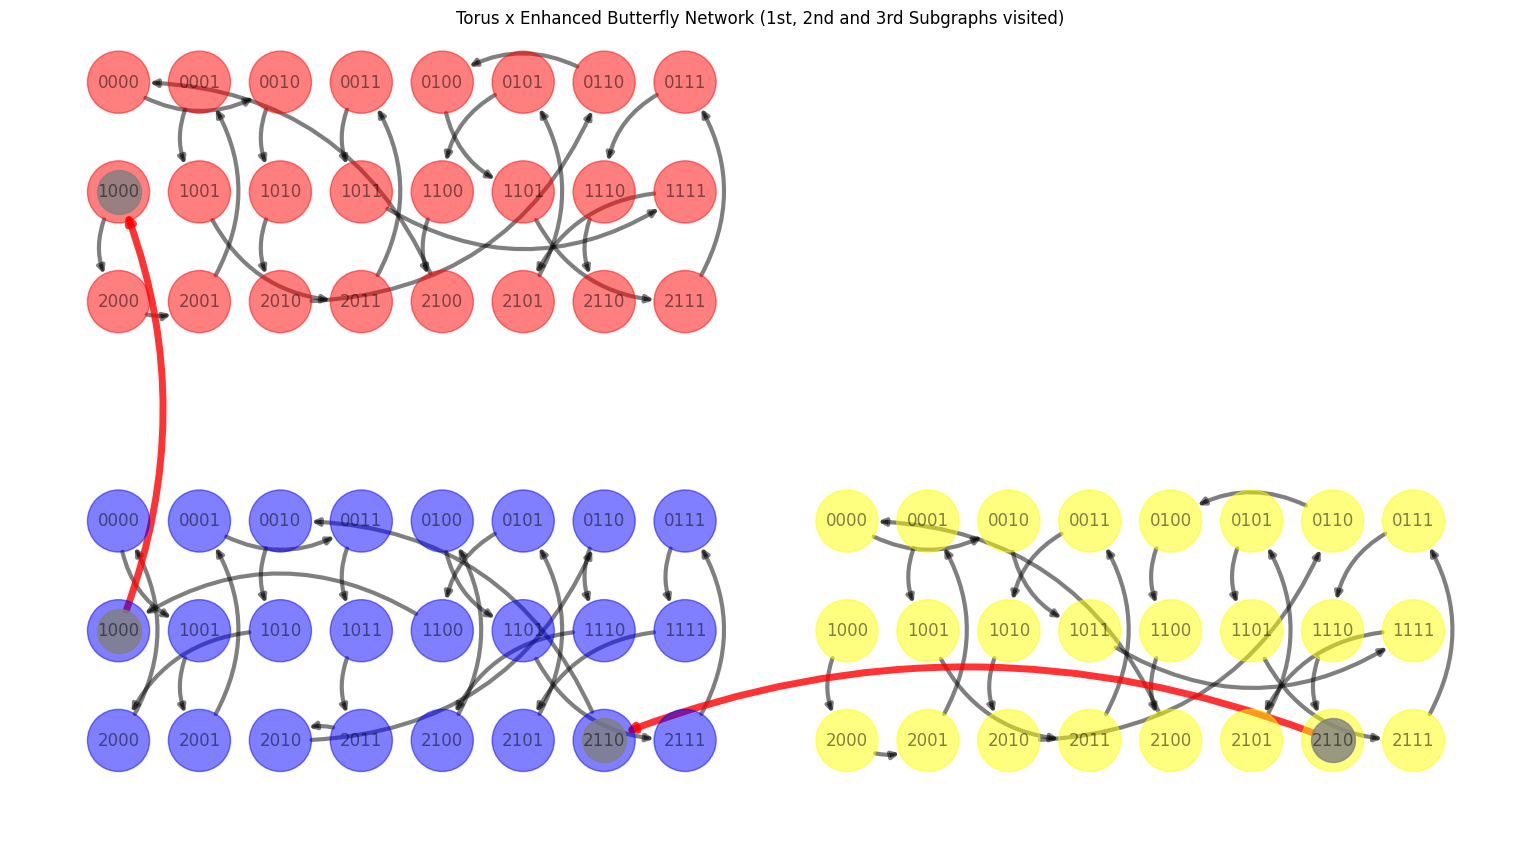

In [71]:
plt.figure(figsize=(15, 8))
nx.draw(H0, H0_pos, with_labels=True, node_color=H0_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.35")
nx.draw(H1, H1_pos, with_labels=True, node_color=H1_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.35")
nx.draw(H0H1_link, H0H1_pos, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.8, font_color="black", font_weight="bold", edge_color="red", arrows=True, connectionstyle="arc3,rad=0.2")
nx.draw(H2, H2_pos, with_labels=True, node_color=H2_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.35")
nx.draw(H1H2_link, H1H2_pos, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.8, font_color="black", font_weight="bold", edge_color="red", arrows=True, connectionstyle="arc3,rad=0.2")

plt.title("Torus x Enhanced Butterfly Network (1st, 2nd and 3rd Subgraphs visited)")
plt.axis('off')
plt.savefig('TxG.png')
plt.show()

# Part 4: Continue walking to a Hamiltonian path in the Last adjacent Subgraph

## Select only one adjacent Subgraph and a Node to finish walking.

In [72]:
xxv.append(xx3)
bridges, subxx = get_next_sub(path_selected, xx3, xxv)
print('Bridges available (subxx, node): ')
for b in bridges:
    print('Current', b[0], ' next: ', b[1])

current subgraph Sub 00 , path:  ['1000', '2000', '2001', '0001', '1001', '2011', '0011', '1011', '1111', '2101', '0101', '1100', '2100', '0000', '0010', '1010', '2010', '0110', '0100', '1101', '2111', '0111', '1110', '2110']
Bridges available (subxx, node): 
Current ('00', '2110')  next:  ('01', '2110')


In [73]:
subxx

['01']

In [74]:
xx4 = '0'
while xx4 not in subxx:
    xx4 = input('Select xx of Subxx, a next Subgraph to continue walking:_ ')

Select xx of Subxx, a next Subgraph to continue walking:_  01


In [75]:
next_node = [next for current, next in bridges if next[0]==xx4]
print('Next node:',next_node[0][1], 'in Sub',next_node[0][0])

Next node: 2110 in Sub 01


In [76]:
n4 = next_node[0][1]

In [77]:
# Display the DataFrame using HTML to wrap text in Jupyter Notebook
m = -1
while int(m) not in range(0, len(Hampath_list)+1):
    m_str = input('how many records you want to list on dataframe table? (empty means all): _')
    if m_str == '': 
        m_str = str(len(Hampath_list))
        print('empty space means all records!')
    m = int(m_str)
    print('m: ', m)

how many records you want to list on dataframe table? (empty means all): _ 10


m:  10


## Explore Hamiltonian Paths in the List, starting from that node

In [78]:
n1_list = [(n, path) for (n, path) in Hampath_list if n==n4][:int(m)]
print('found ', len(n1_list), ' paths with starting node ', n4)
dff = pd.DataFrame(n1_list, columns=[['N1', 'HPath']])
#dff.set_index(inplace=True)
display(HTML(dff.to_html(escape=False)))

found  10  paths with starting node  2110


,N1,HPath
0,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 1001, 2011, 0011, 1011, 1111, 2101, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000]"
1,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 0011, 1011, 1111, 2101, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 1001, 2011]"
2,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 0011, 1011, 1111, 2101, 0101, 1101, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 2010, 0110, 0100, 1100, 1000]"
3,2110,"[2110, 0010, 1010, 2000, 2001, 0001, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 2010, 0110, 0100, 1101, 2101, 0101, 1100, 1000]"
4,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2101, 0001, 1001, 2011, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000]"
5,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2101, 0001, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000, 1001, 2011]"
6,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0011, 1011, 1111, 2101, 0001, 1001, 2011, 0111, 1110, 2100, 0000]"
7,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1100, 1000, 2010, 0110, 0100, 1101, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 0011, 1011, 1111, 2101, 0001]"
8,2110,"[2110, 0010, 1010, 2000, 2001, 0101, 1101, 2101, 0001, 0011, 1011, 1111, 2111, 0111, 1110, 2100, 0000, 1001, 2011, 2010, 0110, 0100, 1100, 1000]"
9,2110,"[2110, 0010, 1010, 2000, 0000, 1001, 2001, 0001, 0011, 1011, 2011, 2010, 0110, 1110, 2100, 0100, 1101, 2111, 0111, 1111, 2101, 0101, 1100, 1000]"


## Select one path from that list

In [79]:
path_index = input('select an index number of the path in that table you want to walk through :_')
path_selected = n1_list[int(path_index)][1]
print('The Hamiltonian path you select is: ', end=' ')
print(path_selected)

select an index number of the path in that table you want to walk through :_ 3


The Hamiltonian path you select is:  ['2110', '0010', '1010', '2000', '2001', '0001', '0011', '1011', '1111', '2111', '0111', '1110', '2100', '0000', '1001', '2011', '2010', '0110', '0100', '1101', '2101', '0101', '1100', '1000']


## Visualize all paths selected

In [80]:
#create H0, graph of hamiltonian path selected by user
hamgraph_4 = nx.DiGraph()
#firstly, create node list
hamgraph_4_node_list = [node for node in path_selected]
for node in hamgraph_4_node_list: print(node, end=',')

2110,0010,1010,2000,2001,0001,0011,1011,1111,2111,0111,1110,2100,0000,1001,2011,2010,0110,0100,1101,2101,0101,1100,1000,

In [81]:
#secondly, create edges from a node to a next node
hamgraph_4_edge_list = []
node_dict = {node:i for i, node in enumerate(hamgraph_4_node_list)}
for i, edge in enumerate(hamgraph_4_node_list):
        if i > len(node_dict)-2: break
        hamgraph_4_edge_list.append((hamgraph_4_node_list[i], hamgraph_4_node_list[i+1]))

In [82]:
H3 = create_graph(hamgraph_4_node_list, hamgraph_4_edge_list)
H3.edges()

OutEdgeView([('2110', '0010'), ('0010', '1010'), ('1010', '2000'), ('2000', '2001'), ('2001', '0001'), ('0001', '0011'), ('0011', '1011'), ('1011', '1111'), ('1111', '2111'), ('2111', '0111'), ('0111', '1110'), ('1110', '2100'), ('2100', '0000'), ('0000', '1001'), ('1001', '2011'), ('2011', '2010'), ('2010', '0110'), ('0110', '0100'), ('0100', '1101'), ('1101', '2101'), ('2101', '0101'), ('0101', '1100'), ('1100', '1000')])

In [83]:
H3_color, H3_pos = set_color_pos(H3, xx4)

In [84]:
#Prepare for the bridge nodes
H2H3_link = nx.DiGraph()
H2H3_link.add_edge(xx3+hamgraph_3_node_list[-1], xx4+hamgraph_4_node_list[0])
#
H2H3_pos = {}
H2H3_pos[xx3+hamgraph_3_node_list[-1]] = H2_pos[hamgraph_3_node_list[-1]]
H2H3_pos[xx4+hamgraph_4_node_list[0]] = H3_pos[hamgraph_4_node_list[0]]
#

In [85]:
H2H3_pos

{'002110': (6, -2), '012110': (15, -2)}

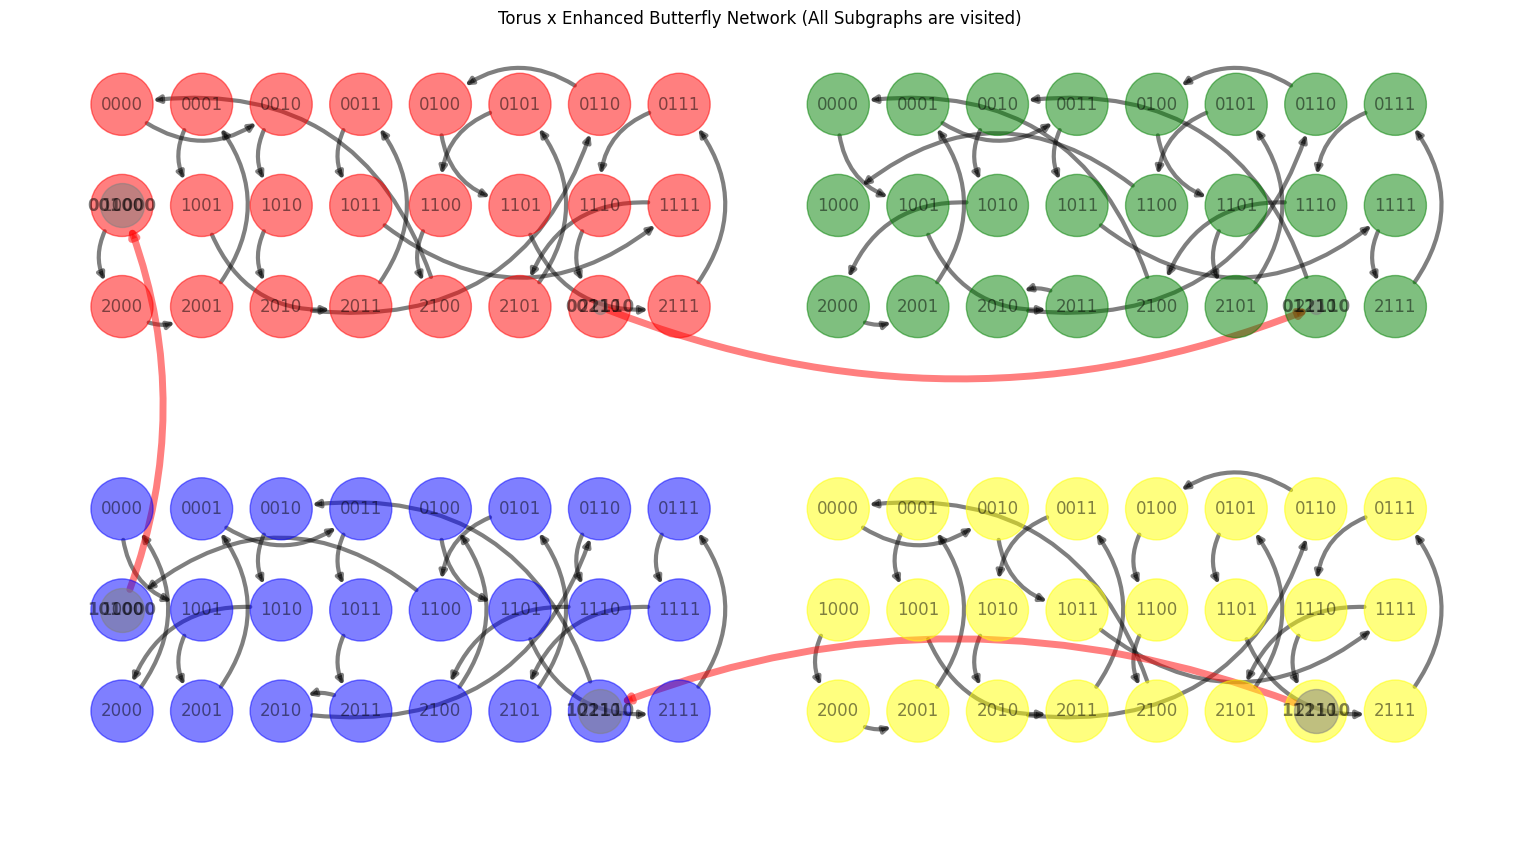

In [86]:
plt.figure(figsize=(15, 8))
nx.draw(H0, H0_pos, with_labels=True, node_color=H0_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H1, H1_pos, with_labels=True, node_color=H1_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H0H1_link, H0H1_pos, with_labels=True, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.5, font_color="black", font_weight="bold", edge_color="red", arrows=True, connectionstyle="arc3,rad=0.2")
nx.draw(H2, H2_pos, with_labels=True, node_color=H2_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H1H2_link, H1H2_pos, with_labels=True, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.5, font_color="black", font_weight="bold", edge_color="red", arrows=True, connectionstyle="arc3,rad=0.2")
nx.draw(H3, H3_pos, with_labels=True, node_color=H3_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H2H3_link, H2H3_pos, with_labels=True, node_size=100, node_color="gray", font_size=12, width=5, alpha=0.5, font_color="black", font_weight="bold", edge_color="red", arrows=True, connectionstyle="arc3,rad=0.2")

plt.title("Torus x Enhanced Butterfly Network (All Subgraphs are visited)")
plt.axis('off')
plt.savefig('TxG.png')
plt.show()

## Visualize path by walking order
### Convert Node Labels from Binary to Sequence Number Representing Walk Order


In [87]:
def walk_order(HamGraph):
    node_list = list(HamGraph.nodes())
    node_order = {node:order+1 for order, node in enumerate(node_list)}
    return node_order

In [88]:
walk_order_H0 = walk_order(H0)
walk_order_H1 = walk_order(H1)
walk_order_H2 = walk_order(H2)
walk_order_H3 = walk_order(H3)

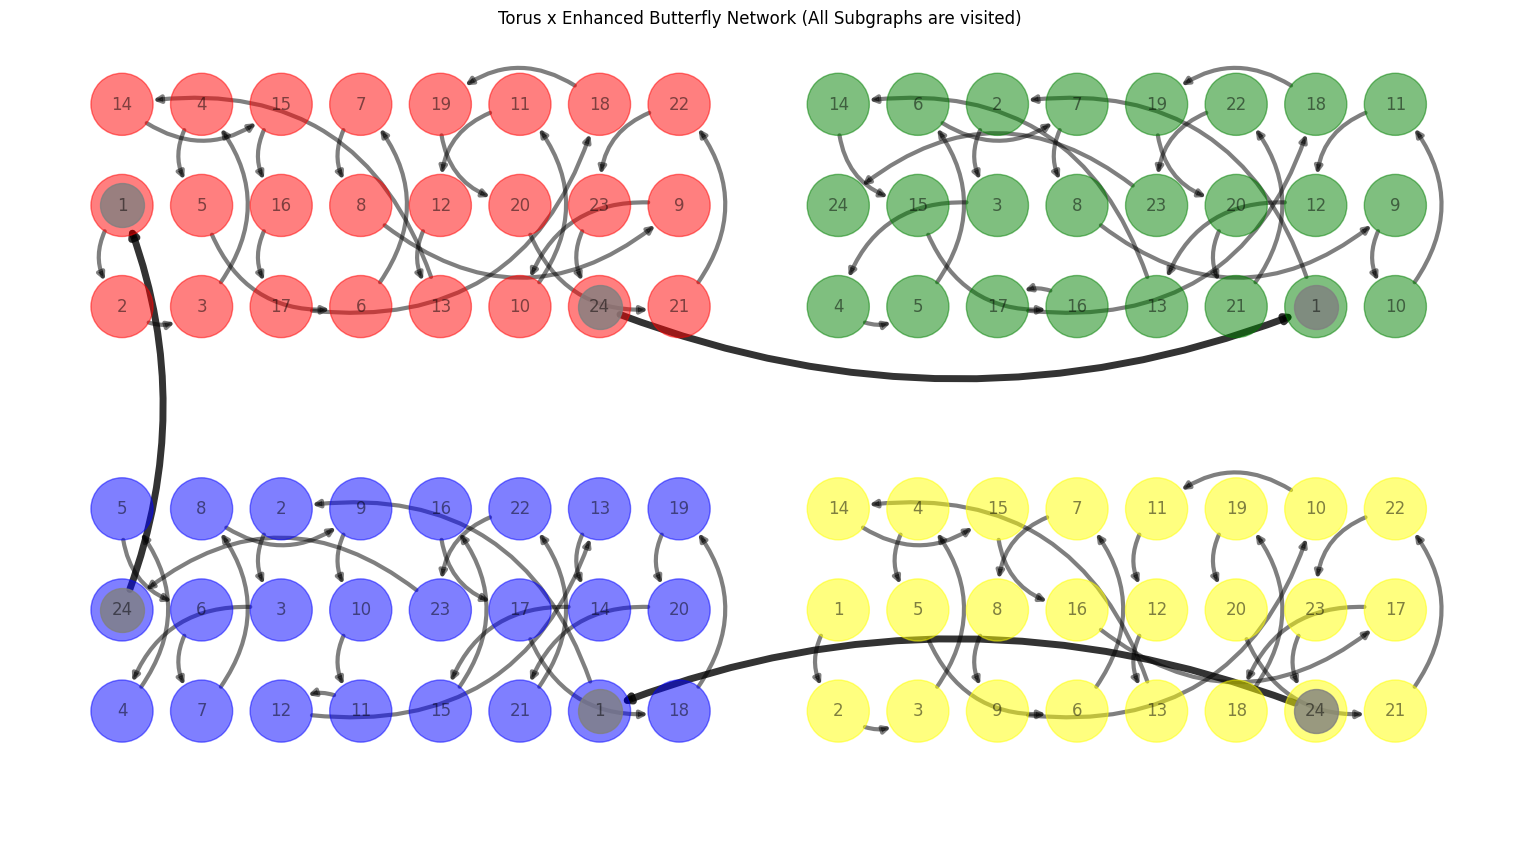

In [89]:
plt.figure(figsize=(15, 8))
nx.draw(H0, H0_pos, labels=walk_order_H0, node_color=H0_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H1, H1_pos, labels=walk_order_H1, node_color=H1_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H0H1_link, H0H1_pos, with_labels=False, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.8, font_color="black", font_weight="bold", edge_color="black", arrows=True, connectionstyle="arc3,rad=0.2")
nx.draw(H2, H2_pos, labels=walk_order_H2, node_color=H2_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H1H2_link, H1H2_pos, with_labels=False, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.8, font_color="black", font_weight="bold", edge_color="black", arrows=True, connectionstyle="arc3,rad=0.2")
nx.draw(H3, H3_pos, labels=walk_order_H3, node_color=H3_color, node_size=2000, font_size=12, width=3, alpha=0.5, font_color="black", connectionstyle="arc3,rad=0.45")
nx.draw(H2H3_link, H2H3_pos, with_labels=False, node_size=1000, node_color="gray", font_size=12, width=5, alpha=0.8, font_color="black", font_weight="bold", edge_color="black", arrows=True, connectionstyle="arc3,rad=0.2")

plt.title("Torus x Enhanced Butterfly Network (All Subgraphs are visited)")
plt.axis('off')
plt.savefig('TxG.png')
plt.show()

<div class="alert alert-block alert-info">
<h1><b>III.</b> LEARNING SECTION </h1> 
<h3>Learners may answer questions regarding the algorithmic properties learned from walking Hamiltonian paths and interacting with this tool.</h3>
</div>

### Nodes and Edges

### Use this function to check some graph properties

In [90]:
# Syntax: graph.edges(), graph.nodes()
print(len(TREB.edges()))
print(len(TREB.nodes()))

480
96


In [91]:
# The Answer list A
A = [''] * 21

In [92]:
A[0] = input("How many nodes in TR(2, 2) graph")

How many nodes in TR(2, 2) graph 4


In [93]:
A[1] = input("How many edges in TR(2, 2) graph")

How many edges in TR(2, 2) graph 8


In [94]:
A[2] = input("How many nodes in EB(3) graph")

How many nodes in EB(3) graph 24


In [95]:
A[3] = input("How many edges in EB(3) graph")

How many edges in EB(3) graph 60


In [96]:
A[4] = input("How many nodes in TREB graph")

How many nodes in TREB graph 96


In [97]:
A[5] = input("How many edges in TREB graph")

How many edges in TREB graph 480


### Paths and Bridges

### Use this function to check some paths and bridges properties

In [98]:
EB.out_degree()

OutDegreeView({'0000': 3, '0010': 3, '1001': 3, '1000': 3, '2000': 3, '1100': 3, '2010': 3, '2001': 3, '0100': 3, '0001': 3, '0011': 3, '2011': 3, '1101': 3, '0101': 3, '1010': 3, '1011': 3, '1110': 3, '0110': 3, '0111': 3, '1111': 3, '2100': 3, '2110': 3, '2101': 3, '2111': 3})

In [99]:
print('number of all paths: ', len(Hampath_list))
print('number of paths, starting from a node:_', len([(n, path) for (n, path) in Hampath_list if n=='0000'][:]))
print()
print('outdegree of nodes: ', TREB.out_degree())
print('indegree of nodes: ', TREB.in_degree())
print('total degree of nodes: ', TREB.degree())
print()
print('out edge of node 0000: ', [edge for edge in TREB.out_edges() if edge[0]=='0000'])
print('in edge of node 0000: ', [edge for edge in TREB.in_edges() if edge[1]=='0000'])

number of all paths:  89736
number of paths, starting from a node:_ 3739

outdegree of nodes:  [(('00', '0000'), 5), (('00', '0010'), 5), (('00', '1001'), 5), (('00', '1000'), 5), (('00', '2000'), 5), (('00', '1100'), 5), (('00', '2010'), 5), (('00', '2001'), 5), (('00', '0100'), 5), (('00', '0001'), 5), (('00', '0011'), 5), (('00', '2011'), 5), (('00', '1101'), 5), (('00', '0101'), 5), (('00', '1010'), 5), (('00', '1011'), 5), (('00', '1110'), 5), (('00', '0110'), 5), (('00', '0111'), 5), (('00', '1111'), 5), (('00', '2100'), 5), (('00', '2110'), 5), (('00', '2101'), 5), (('00', '2111'), 5), (('01', '0000'), 5), (('01', '0010'), 5), (('01', '1001'), 5), (('01', '1000'), 5), (('01', '2000'), 5), (('01', '1100'), 5), (('01', '2010'), 5), (('01', '2001'), 5), (('01', '0100'), 5), (('01', '0001'), 5), (('01', '0011'), 5), (('01', '2011'), 5), (('01', '1101'), 5), (('01', '0101'), 5), (('01', '1010'), 5), (('01', '1011'), 5), (('01', '1110'), 5), (('01', '0110'), 5), (('01', '0111'), 5), (

In [100]:
# Your output as Markdown-formatted text
note = """
### A Bridge
#### A bridge is actually an edge that links two nodes, so the bridges of a node can be determined from the in_edges and out_edges of that node.
"""
# Display the Markdown-formatted output
display(Markdown(note))

A[6] = input("How many bridge edges link a node in one Subgraph to nodes in other Subgraphs?")


### A Bridge
#### A bridge is actually an edge that links two nodes, so the bridges of a node can be determined from the in_edges and out_edges of that node.


How many bridge edges link a node in one Subgraph to nodes in other Subgraphs? 2


In [101]:
A[7] = input("Which Subgraphs can be connected by nodes in the Subgraph at position 00 in the Torus? (Write only the Torus labels, separated by a comma: choices: {01, 11, 10})"
)

Which Subgraphs can be connected by nodes in the Subgraph at position 00 in the Torus? (Write only the Torus labels, separated by a comma: choices: {01, 11, 10}) 11


In [102]:
A[8] = input("What is the outdegree of a node in EB(3) Subgraph?")

What is the outdegree of a node in EB(3) Subgraph? 3


In [103]:
A[9] = input("What is the indegree of a node in a Subgraph?")

What is the indegree of a node in a Subgraph? 2


In [104]:
A[10] = input("What is the (total) degree of a node in a Subgraph according to this tool?")

What is the (total) degree of a node in a Subgraph according to this tool? 5


In [105]:
A[11] = input("What is the (total) degree of a node in a Subgraph theoretically?")

# The output as Markdown-formatted text
note = """
### "How do the degrees theoretically and practically differ?"
#### The difference in degree occurs because this tool applies two directed edges in opposite directions to represent a bidirectional edge in EB(3).
"""
# Display the Markdown-formatted output
display(Markdown(note))

What is the (total) degree of a node in a Subgraph theoretically? 5



### "How do the degrees theoretically and practically differ?"
#### The difference in degree occurs because this tool applies two directed edges in opposite directions to represent a bidirectional edge in EB(3).


In [106]:
A[12] = input("What is the outdegree of a node in TREB Subgraph?")

What is the outdegree of a node in TREB Subgraph? 5


In [107]:
A[13] = input("What is the indegree of a node in TREB Subgraph?")

What is the indegree of a node in TREB Subgraph? 5


In [108]:
A[14] = input("What is the (total) degree of a node in TREB Subgraph according to this tool?")

What is the (total) degree of a node in TREB Subgraph according to this tool? 10


In [109]:
A[15] = input("What is the (total) degree of a node in TREB Subgraph theoretically?")

What is the (total) degree of a node in TREB Subgraph theoretically? 9


In [110]:
A[16] = input("How these degrees differ?")

How these degrees differ? not sure


<div class="alert alert-block alert-info">
<h2>Action Research Questions</h2>
The other questions are addressed in the paper.

### The Questions

In [111]:
A[17] = input("Have you been focusing on Hamiltonian Path visualization by repeatedly executing it? (Y/N)")

Have you been focusing on Hamiltonian Path visualization by repeatedly executing it? (Y/N) Y


In [112]:
A[18] = input("Which section have you been focusing on the most? (choose one: 1/2/3)")

Which section have you been focusing on the most? (choose one: 1/2/3) 2


In [113]:
A[19] = input("In which cell is the dynamic programming approach used?")

In which cell is the dynamic programming approach used? 3d


In [116]:
# The output as Markdown-formatted text
note = """
### See Cell about 3d. Finding all Hamiltonian Paths in the EB Graph
"""
# Display the Markdown-formatted output
display(Markdown(note))
A[20] = input("What is the execution time required for your computer to find all these Hamiltonian paths? How many paths were found?")


### See Cell about 3d. Finding all Hamiltonian Paths in the EB Graph


What is the execution time required for your computer to find all these Hamiltonian paths? How many paths were found? 18 seconds, same


## Check the Answer
Run the following cell to compare your answer to the correct answer

In [117]:
#Collect your answer
from IPython.display import display, HTML
dfQA = pd.read_excel('ARQnA.xlsx')
dfQA['Your Answer'] = A
pd.set_option('display.max_colwidth', None)

In [118]:
dfQA

,No,Question,True Answer,Your Answer
0,1,"How many nodes in TR(2, 2) graph","""4""",4
1,2,"How many edges in TR(2, 2) graph","""8""",8
2,3,How many nodes in EB(3) graph,"""24""",24
3,4,How many edges in EB(3) graph,"""60""",60
4,5,How many nodes in TREB graph,"""96""",96
5,6,How many edges in TREB graph,"""432""",480
6,7,How many bridge edges link a node in one Subgraph to nodes in other Subgraphs?,"""2""",2
7,8,"Which Subgraphs can be connected by nodes in the Subgraph at position 00 in the Torus? (Write only the Torus labels, separated by a comma: choices: {01, 11, 10})","""01, 10""",11
8,9,What is the outdegree of a node in EB(3) Subgraph?,"""3""",3
9,10,What is the indegree of a node in a Subgraph?,"""3""",2
